## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Must do header=1 coz dataset does not have pre defined standard columns
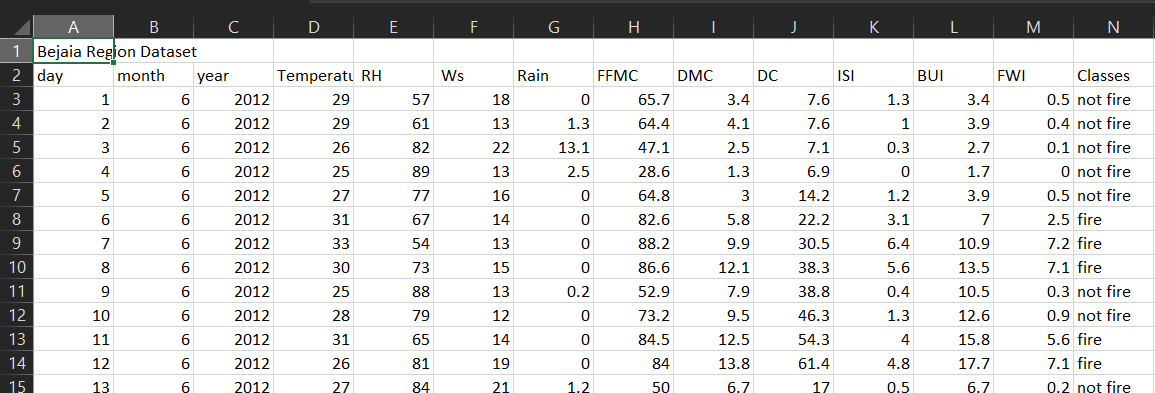

In [ ]:
file=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
file.head()

As we are doing regression so FWI will be our dependent feature and all others will be independent
else for classification classes could be the dependent feature

### DATA CLEANING

Here dataset is divided on base of 2 regions

so for Bejaia Region it is the upper half and for Abbes it is the lower half

that's why roww 122 has null

and NaN value at 167 so as it is a single row having null we can remove the whole row

In [ ]:
file[file.isnull().any(axis=1)]

Adding a new column with region

In [ ]:
file.loc[:122,"Region"]=0 #assign 0 values for Bejaia Region
file.loc[122:,"Region"]=1 #assign 1 value for Abbes Region

In [ ]:
file['Region'].head()

In [ ]:
file['Region'].tail()

In [ ]:
file

Region has float values and will take more memory so converting it into int type

In [ ]:
file[['Region']]=file[['Region']].astype("int32")

In [ ]:
file

In [ ]:
file.info()

In [ ]:
file=file.dropna().reset_index(drop=True)

In [ ]:
file.info()

In [ ]:
file.isnull().sum()

In [ ]:
file.iloc[[122]] #for region 2 abbes the  columns were redefined

In [ ]:
file=file.drop([122]).reset_index(drop=True) #removing duplicacy in redefining columns
file

In [ ]:
file.iloc[[122]]

Datatypes of columns

In [ ]:
#fix spaces in column names
file.columns=file.columns.str.strip()

In [ ]:
file.columns

In [ ]:
file.info()

as many of these columns have value as int float but the datatype assigned is object

we should convert them to int/float

Classes will be object type as it will be used for classification purpose and also it does not belong to numerical datatype

In [ ]:
file[['day','month','year','Temperature','RH','Ws']]=file[['day','month','year','Temperature','RH','Ws']].astype("int32")

In [ ]:
objects=[features for features in file.columns if file[features].dtypes=='object']
objects

In [ ]:
for i in objects:
    if i!='Classes':
        file[i]=file[i].astype(float)

In [ ]:
file.info()

In [ ]:
#Now getting a cleaned dataset
#here we have indexing like serial no so to remove that index=False
file.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

Exploratory Data Analysis

In [ ]:
#Here we do not need day month year so remove them
file_copy=file.drop(columns=['day','month','year'],axis=1)
file_copy

In [ ]:
file_copy.head()

for Classes we have 'not fire' and 'fire' so we can convert them into 0,1

In [ ]:
file_copy['Classes'].value_counts()

In [ ]:
file_copy['Classes']=np.where(file_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
file_copy

Density Plots

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
file_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#Percentage of fire not fire for pie chart
percentage=file_copy['Classes'].value_counts(normalize=True)*100    #normalize=True will give you the percentage of 1 and 0 out of total proportion
percentage

In [ ]:
classlabels=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Percentage of Classes')
plt.show()

### Correlation

In [ ]:
file_copy.corr()

In [ ]:
sns.heatmap(file_copy.corr(),annot=True)

In [ ]:
sns.boxplot(file['FWI'],color='green')

In [ ]:
file.head()

In [ ]:
file['Classes']=np.where(file['Classes'].str.contains('not fire'),'not fire','fire')    #just to remove the  spaces in strings else will generate a different label

In [ ]:
## Monthly Fire Analysis
filetemp=file.loc[file['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=file)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

In [ ]:
## Monthly Fire Analysis
filetemp2=file.loc[file['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=filetemp2)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')